# S1b


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

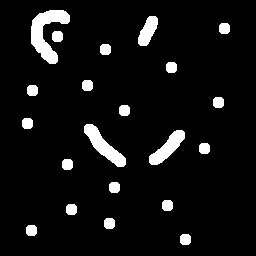

In [3]:
img = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/particles.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

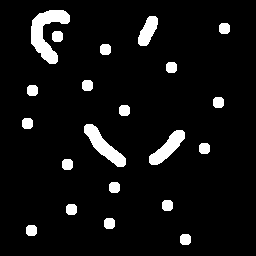

In [4]:
img3d = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/particles.png")
cv2_imshow(img3d)

In [5]:
img.shape

(256, 256)

In [52]:
def grassfire(visited, image, groups, x, y, group):
  #check the pixel is not already seen
  if visited[x][y] == 0 and image[x][y] == 255:
    groups[x][y] = group
    visited[x][y] = 1

    #look if there is still a cell down
    if x < image.shape[0]-1:
      #check if not beckground
      if image[x+1][y] == 255:
        #print('call for', x+1, y)
        grassfire(visited, image, groups, x+1, y, group)

    #look if there is still a cell on the right
    if y < image.shape[1]-1:
      #check if not beckground
      if image[x][y+1] == 255:
        #print('call for', x, y+1)
        grassfire(visited, image, groups, x, y+1, group)

    #look if there is a cell on the left
    if x > 0:
      #check if not beckground
      if image[x-1][y] == 255:
        #print('call for', x-1, y)
        grassfire(visited, image, groups, x-1, y, group)

    #look if there is a cell on the left
    if y > 0:
      #check if not beckground
      if image[x-1][y] == 255:
        #print('call for', x, y-1)
        grassfire(visited, image, groups, x, y-1, group)

    

In [53]:
group = 1
groups = np.zeros(img.shape)
visited = np.zeros(img.shape) # 0:not visited 1:visited

for x in range(img.shape[0]-1):
  for y in range(img.shape[1]-1):

    if (img[x][y] == 255) and (visited[x][y] == 0):
      print('start process group: ', group)
      print('pixel', x, y)
      grassfire(visited, img, groups, x, y, group)
      group += 1

start process group:  1
pixel 10 49
start process group:  2
pixel 16 149
start process group:  3
pixel 23 221
start process group:  4
pixel 31 54
start process group:  5
pixel 44 102
start process group:  6
pixel 62 168
start process group:  7
pixel 80 84
start process group:  8
pixel 85 29
start process group:  9
pixel 97 215
start process group:  10
pixel 105 121
start process group:  11
pixel 118 24
start process group:  12
pixel 124 86
start process group:  13
pixel 130 176
start process group:  14
pixel 143 201
start process group:  15
pixel 159 64
start process group:  16
pixel 182 111
start process group:  17
pixel 200 164
start process group:  18
pixel 204 68
start process group:  19
pixel 218 106
start process group:  20
pixel 225 28
start process group:  21
pixel 234 182


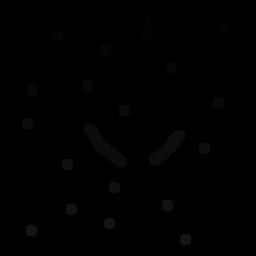

In [54]:
cv2_imshow(groups)

In [61]:
colors = {}

CORAL = (255, 127, 80)
ANTIQUEWHITE = (250, 235, 215)
ORANGE = (255, 128, 0)
RED1 = (255, 0, 0)
ANTIQUEWHITE3 = (205, 192, 176)
ANTIQUEWHITE4 = (139, 131, 120)
AQUA = (0, 255, 255)
AQUAMARINE1 = (127, 255, 212)
PINK = (255, 192, 203)
AQUAMARINE3 = (102, 205, 170)
AQUAMARINE4 = (69, 139, 116)
AZURE1 = (240, 255, 255)
SALMON = (250, 128, 114)
AZURE3 = (193, 205, 205)
AZURE4 = (131, 139, 139)
BANANA = (227, 207, 87)
BEIGE = (245, 245, 220)
BISQUE1 = (255, 228, 196)
BISQUE2 = (238, 213, 183)
TOMATO1 = (255, 99, 71)
BISQUE4 = (139, 125, 107)

colors['coral'] = CORAL
colors['antiquewhite'] = ANTIQUEWHITE
colors['orange'] = ORANGE
colors['red1'] = RED1
colors['antiquewhite3'] = ANTIQUEWHITE3
colors['antiquewhite4'] = ANTIQUEWHITE4
colors['aqua'] = AQUA
colors['aquamarine1'] = AQUAMARINE1
colors['pink'] = PINK
colors['aquamarine3'] = AQUAMARINE3
colors['aquamarine4'] = AQUAMARINE4
colors['azure1'] = AZURE1
colors['salmon'] = SALMON
colors['azure3'] = AZURE3
colors['azure4'] = AZURE4
colors['banana'] = BANANA
colors['beige'] = BEIGE
colors['bisque1'] = BISQUE1
colors['bisque2'] = BISQUE2
colors['tomato1'] = TOMATO1
colors['bisque4'] = BISQUE4

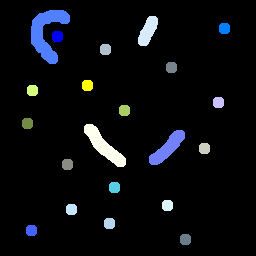

In [62]:
 # Assign colors we have created before (just for visualization)
  # Create an empty 'mask_rgb' array filled with zeros
mask_rgb = np.zeros([img.shape[0], img.shape[1], 3])
  # For each class in the mask, assign the corresponding color (colors[i])
i = 1
for color_idx in colors.keys():
   mask_rgb[np.where(groups == i)] = np.array(colors[color_idx])[:3]
   i+= 1

cv2_imshow(mask_rgb)